In [3]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 10

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
df=pd.read_csv(r'e:\Users\ACER\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv', delimiter=',', header= 0,
                             names=['sepal length(cm)', 
                                    'sepal width (cm)',
                                    'petal length (cm)', 
                                    'petal width (cm)',
                                    'Variety'])

df.head()

,sepal length(cm),sepal width (cm),petal length (cm),petal width (cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
le = LabelEncoder()
le.fit(df['Variety'].values)
y = le.transform(df['Variety'].values)
x = df.drop(['Variety'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.34,
                                                   stratify= y,
                                                   random_state= seed)

In [7]:
tree = DecisionTreeClassifier(criterion = 'gini',
                             min_samples_leaf=5,
                             min_samples_split=5,
                             max_depth=None,
                             random_state=seed)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('DecsionTreeClassifire accuracy score: {}'.format(accuracy*100))

DecsionTreeClassifire accuracy score: 96.15384615384616


Confusion matrox is 
[[17  0  0]
 [ 0 17  1]
 [ 0  1 16]]


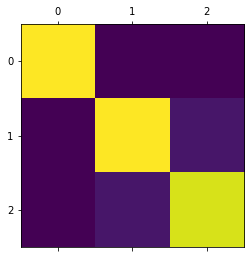

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print('Confusion matrox is ')
print(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.matshow(cm)
plt.show()

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=df['Variety'].unique()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



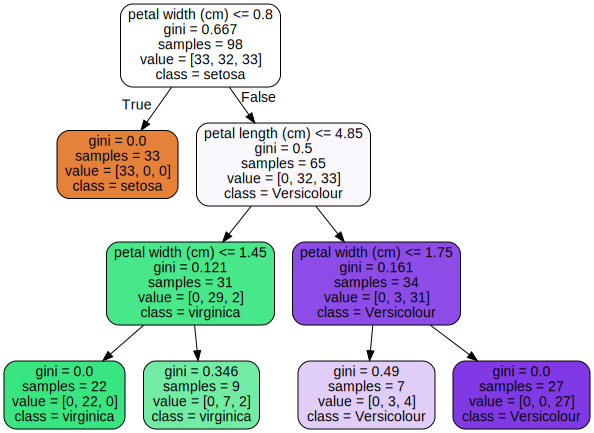

In [10]:
import os 
os.environ["Path"]+=os.pathsep+ r'E:\Program Files\Graphviz\bin'
def plot_tree(tree, dataframe, label_col, label_encoder,plot_title):
    label_names=['setosa','virginica','Versicolour']
    graph_data= export_graphviz(tree,
                               feature_names=dataframe.drop(label_col,axis=1).columns,
                               class_names=label_names,
                               filled=True,
                               rounded=True,
                               out_file=None)
    graph= graphviz.Source(graph_data)
    graph.render(plot_title,view=True)
    return graph
tree_graph= plot_tree(tree,df,'Variety',le,'iris')
tree_graph

In [11]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB


In [12]:
# Assigning features and label variables

weather=['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',

     'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',

     'Overcast','Sunny']



temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool'

   'Mild','Cool','Mild','Mild','Mild','Hot','Mild']



play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes',

   'Yes','Yes','No']

In [13]:
import pandas as pd
data={'weather':['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny','Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
                 'Overcast','Sunny'],
      'temp':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
      'play':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}
data=pd.DataFrame(data)
data

,weather,temp,play
0,Rainy,Hot,No
1,Rainy,Hot,No
2,Overcast,Hot,Yes
3,Sunny,Mild,Yes
4,Sunny,Cool,Yes
5,Sunny,Cool,No
6,Overcast,Cool,Yes
7,Rainy,Mild,No
8,Rainy,Cool,Yes
9,Sunny,Mild,Yes


In [14]:
data.dtypes


weather    object
temp       object
play       object
dtype: object

In [15]:

weather_encoded=le.fit_transform(data['weather'])
print(weather_encoded)

[1 1 0 2 2 2 0 1 1 2 1 0 0 2]


In [16]:
weather_encoded=le.fit_transform(data['weather'])
temp_encoded=le.fit_transform(data['temp'])
label=le.fit_transform(data['play'])
print("weather:",weather_encoded)
print("temp:",temp_encoded)
print("play:",label)

weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [17]:

features=zip(weather_encoded,temp_encoded)
features_ls=list(features)
print(features_ls)

[(1, 1), (1, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (1, 2), (1, 0), (2, 2), (1, 2), (0, 2), (0, 1), (2, 2)]


In [18]:
model=BernoulliNB()
model.fit(features_ls,label)

predicted=model.predict([[1,0]])
print("Predicted Value:",predicted)

Predicted Value: [1]
